# Ex Chap_8 Credit Card Fraud Detection via Dimension Reduction

Dataset:[kaggle Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data_import = pd.read_csv('../../data_local/creditcard.csv') # large file 150MB

In [23]:
data_import

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [24]:
unused = data_import[["Time","Amount"]]
X = data_import.iloc[:,1:-2] # remove the first "time" and last "amount" "class" columns
y = data_import["Class"]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [25]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=10) # 10 components
X10D = pca.fit_transform(X) # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D

,0,1,2,3,4,5,6,7,8,9
0,1.359847,0.073296,-2.536311,1.379264,0.337712,0.463802,0.234658,-0.091707,0.376215,-0.079552
1,-1.191932,-0.267123,-0.166658,0.446069,-0.059130,-0.085406,-0.069590,-0.098850,-0.278494,0.154655
2,1.358517,1.342782,-1.773219,0.387148,0.500766,1.805940,0.768810,-0.212367,-1.469158,-0.229999
3,0.966411,0.186577,-1.793133,-0.860835,0.010266,1.249414,0.223285,-0.365853,-1.353873,0.042044
4,1.158310,-0.876932,-1.548471,0.404415,0.406704,0.099507,0.584206,0.279727,0.849978,-0.722797
...,...,...,...,...,...,...,...,...,...,...
284802,11.881105,-10.070288,9.833970,-2.061308,5.361079,-2.606397,-4.928531,-7.282172,1.973014,-4.352590
284803,0.732950,0.055935,-2.034485,-0.737051,-0.867726,1.061977,0.012115,-0.287998,0.600888,1.001714
284804,-1.919517,0.302192,3.249767,-0.555657,-2.632285,3.034883,-0.306017,-0.692912,0.443471,0.513432
284805,0.240521,-0.529974,-0.702110,0.690257,0.378284,0.627019,-0.694761,-0.672713,0.408769,0.423748


In [28]:
# 95 %  explained variance ratio 
pca = PCA()
XD = pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)
d

21

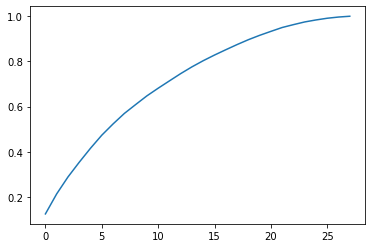

In [29]:
_, ax = plt.subplots(figsize =(6,4))

ax = plt.plot(cumsum)

PCA can be used to compress the amount of information that has to be plotted. 

Let's say that you perform PCA and take in all the components that constitute 95% of the variance in the dataset.You can then take those PCA's and inverse transform them to get something close to the origina data. 

- The 5% that you'll be missing is part of the **reconstruction error**.

In [33]:
pca = PCA(n_components=10)  # 10 components
X10D = pca.fit_transform(X)  # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D_inverse = pca.inverse_transform(X10D)
X10D_inverse = pd.DataFrame(X10D_inverse)
X10D_inverse

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.359861,-0.073225,2.537585,1.376040,-0.343470,0.463697,0.236125,0.092021,0.348823,0.070743,...,0.001294,-0.001073,0.001349,0.000228,-0.000254,-0.000137,0.000166,-0.000039,0.000010,-0.000002
1,1.191987,0.265930,0.167969,0.448276,0.057902,-0.081689,-0.079894,0.086559,-0.252320,-0.169953,...,-0.004585,0.002200,-0.000206,-0.002551,0.000134,-0.000286,-0.000067,-0.000039,0.000003,-0.000003
2,-1.357671,-1.340881,1.782011,0.381067,-0.513959,1.808305,0.788263,0.267808,-1.590866,0.196800,...,-0.032463,0.009469,0.008615,-0.018382,0.002531,0.001049,-0.000600,-0.000281,0.000037,-0.000015
3,-0.965869,-0.185762,1.797619,-0.861673,-0.016901,1.248856,0.233657,0.388124,-1.415763,-0.062001,...,-0.027757,0.009665,0.004201,-0.015415,0.002317,0.000423,-0.000524,-0.000242,0.000024,-0.000013
4,-1.158718,0.877721,1.543431,0.399152,-0.403235,0.092102,0.592749,-0.291011,0.871028,0.742720,...,0.012246,-0.008366,0.005629,0.006171,-0.000627,0.000919,0.000243,0.000009,0.000009,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.880403,10.070718,-9.825439,-2.065503,-5.376528,-2.598825,-4.922008,7.324667,1.836155,4.346460,...,-0.002868,-0.041461,0.073506,-0.005872,0.003638,-0.005340,-0.000342,-0.002896,0.000202,-0.000067
284803,-0.732548,-0.054919,2.036063,-0.736272,0.869323,1.057868,0.024411,0.306869,0.576105,-0.968059,...,0.008762,0.002577,-0.012406,0.005556,0.000230,-0.001124,0.000355,0.000242,-0.000033,0.000009
284804,1.919652,-0.301389,-3.247013,-0.557726,2.626277,3.034404,-0.297395,0.710062,0.406744,-0.488858,...,0.008446,-0.004857,-0.000817,0.005620,0.002711,-0.000507,0.000189,-0.000023,-0.000021,0.000008
284805,-0.241054,0.530204,0.696961,0.683778,-0.376847,0.620137,-0.689380,0.652569,0.424339,-0.431727,...,0.002920,0.001048,-0.004221,0.001570,-0.000268,-0.001368,0.000220,-0.000047,-0.000003,-0.000001


In [35]:
X10D # compare

,0,1,2,3,4,5,6,7,8,9
0,1.359862,0.073222,-2.537577,1.376094,0.343481,0.463821,0.236048,-0.092442,0.348521,-0.070417
1,-1.191987,-0.265930,-0.167951,0.448269,-0.057982,-0.081725,-0.079862,-0.086503,-0.252734,0.169555
2,1.357676,1.340875,-1.781859,0.381031,0.513694,1.808276,0.788156,-0.266794,-1.591885,-0.199054
3,0.965872,0.185754,-1.797509,-0.861736,0.016794,1.248767,0.233573,-0.387187,-1.416966,0.060023
4,1.158717,-0.877720,-1.543477,0.399203,0.403474,0.092295,0.592631,0.290647,0.872336,-0.741551
...,...,...,...,...,...,...,...,...,...,...
284802,11.880405,-10.070676,9.825689,-2.065552,5.377202,-2.598291,-4.924846,-7.321629,1.836318,-4.348356
284803,0.732547,0.054911,-2.036117,-0.736286,-0.869280,1.057829,0.024464,-0.307963,0.574638,0.968697
284804,-1.919654,0.301403,3.246922,-0.558001,-2.626771,3.034024,-0.297382,-0.710697,0.406061,0.488696
284805,0.241055,-0.530207,-0.696933,0.683841,0.376732,0.620200,-0.689523,-0.653058,0.423057,0.432015


If you have a lot of dimensions in your PCA then you might want to take a stochastic approach where the computer will try and estimate your PCAs instead of calculating them. 

You can do thisby setting the `svd_ solver` hyperparameter of the `PCA` clags to `randomized`. By default, this hyperparameter is set to `auto` which means that skLearn will run the full PCA unless the amountof dimensions is too high. You can force it to run the full PCA by setting the `svd_ solver` hyperparameter to `full`.

PCAs work only if the whole training dataset fits into memory. Luckily you can run the PCAincrementally using the `Incremental PCA` class.

Compare KernelPCA with LogisticRegression

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

In [46]:
clf = Pipeline([
    ("kpca",KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression())
])

param_grid = [{
    "kpca__gamma":np.linspace(0.03,0.05,10),
    "kpca__kernel":["rbf","sigmoid"]
}]

In [47]:
# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X,y) ## >6min

In [ ]:
# print(grid_search.best_params_)

Error: Session cannot generate requests